## Email Spam Detection

    Problem Statement :create a Spam mail Detection Model
                       

In [1]:
!pip install -q wordcloud
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saurabh.kamthe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saurabh.kamthe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saurabh.kamthe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saurabh.kamthe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#### Import the Data

In [3]:
import pandas as pd
df = pd.read_csv("messages.csv",encoding='latin-1')
df.head(10)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0


##### We have succefully imported the dataset into our dataframe now lets look into the data 

In [4]:
df.shape

(2893, 3)

###### As we can see there are 2893 entries and 3 columns 

## Lets see if there are any missing values

In [5]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

As we can see there are 62 less entries in the subject column 

In [6]:
df['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

Here 0 Stands for Not a Spam mail 
1 stands for a Spam mail 

In [7]:
print("Spam Email Ratio that is 1 label:",round(len(df[df['label']==1])/len(df['label']),2)*100,"%")
print("Not a Spam Email Ratio i.e. 0 label:",round(len(df[df['label']==0])/len(df['label']),2)*100,"%")

Spam Email Ratio that is 1 label: 17.0 %
Not a Spam Email Ratio i.e. 0 label: 83.0 %


In [8]:
#Creating the new column for length of message column
df['length'] = df.message.str.len()
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


## Data Cleaning

In [9]:
df['message'] = df['message'].str.lower()

In [10]:
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace currency symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollars')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numeric characters with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'num')

In [11]:
# Remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

In [12]:
#Removing the stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['message'] = df['message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [13]:
df['clean_length'] = df.message.str.len()
df.head()

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length num apple iss research center u...,0,2856,2153
1,NaN,lang classification grimes joseph e barbara f ...,0,1800,1412
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435,1024
3,risk,colleague researching differing degrees risk p...,0,324,210
4,request book information,earlier morning phone friend mine living south...,0,1046,629


In [14]:
print("Original Length:",df.length.sum())
print("Cleaned Length:",df.clean_length.sum())
print("Total Words Removed:",(df.length.sum()) - (df.clean_length.sum()))

Original Length: 9344743
Cleaned Length: 6601249
Total Words Removed: 2743494


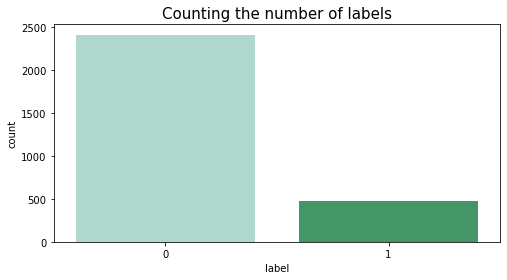

0    2412
1     481
Name: label, dtype: int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
#Graphical Visualisation for counting number of labels.
plt.figure(figsize=(8,4))
sns.countplot(df['label'],palette = 'BuGn')
plt.title("Counting the number of labels",fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

print(df.label.value_counts())

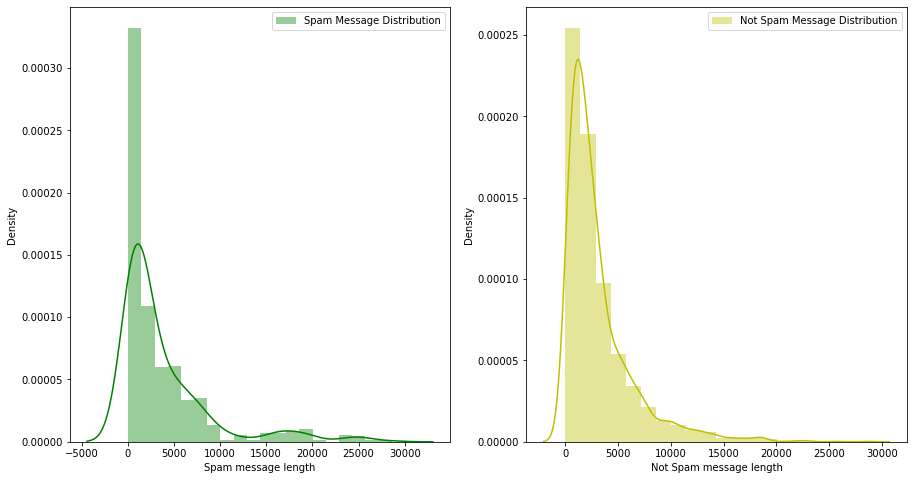

In [16]:
#Message distribution before cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==1]['length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='g')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='y')
ax[1].set_xlabel('Not Spam message length')
ax[1].legend()

plt.show()

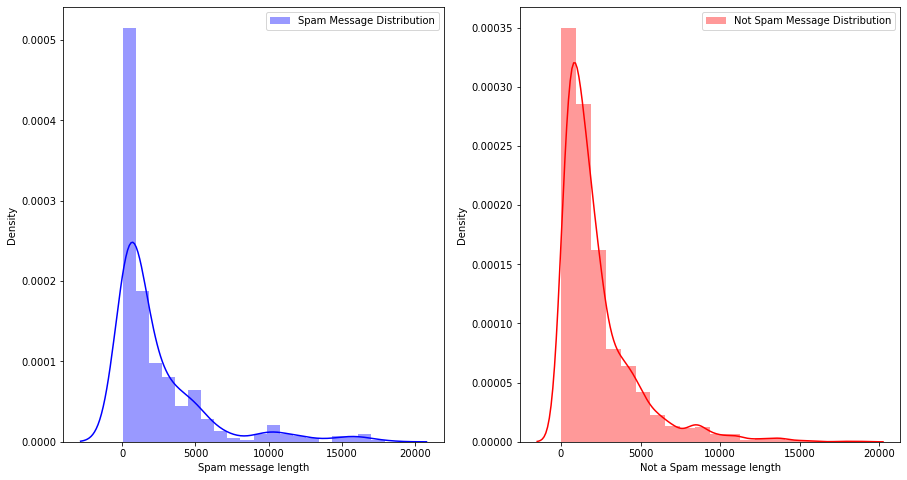

In [17]:
#Message distribution after cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='b')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='r')
ax[1].set_xlabel('Not a Spam message length')
ax[1].legend()

plt.show()

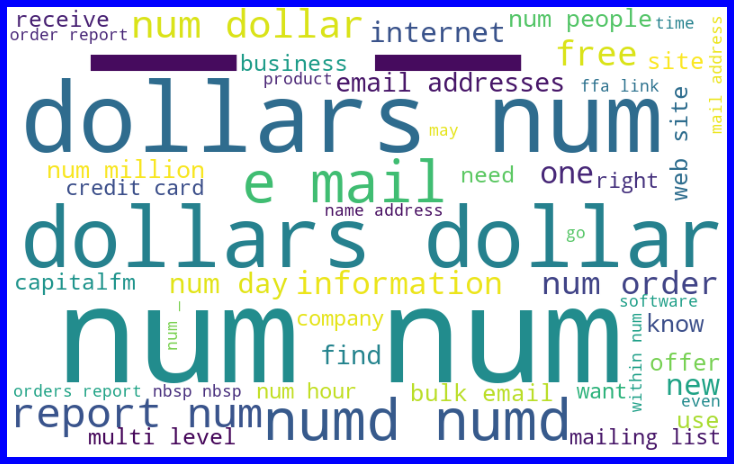

In [18]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['message'][df['label']==1]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

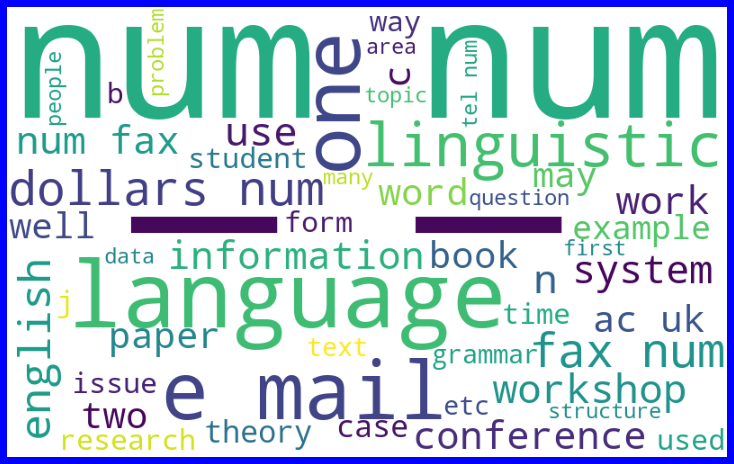

In [19]:
#Getting sense of loud words in not-spam 
from wordcloud import WordCloud

not_spams = df['message'][df['label']==0]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(not_spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [35]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

tf_vec = TfidfVectorizer()


nbclassifier = MultinomialNB()

SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')

X1 = df['message']


#X = features
y = df['label']


## Navie Bayes

In [36]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X1,y,test_size=0.20,random_state=42) 

features = tf_vec.fit_transform(X_train)

x2 = features
nbclassifier.fit(x2, Y_train)
x2_test = tf_vec.transform(x_test)
y_predcl = nbclassifier.predict(x2_test)
print ('Final score = > ', accuracy_score(y_test,y_predcl))


Final score = >  0.8324697754749568


In [22]:
# Checking Classification report
print(classification_report(y_test, y_predcl))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       464
           1       1.00      0.12      0.22       115

    accuracy                           0.83       579
   macro avg       0.91      0.56      0.56       579
weighted avg       0.86      0.83      0.77       579



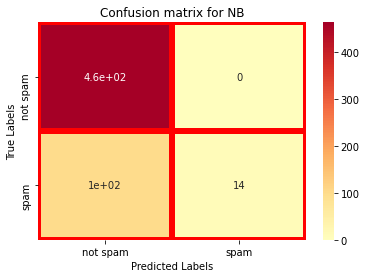

In [23]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_predcl)

ax=plt.subplot()

sns.heatmap(conf_mat,cmap="RdYlBu_r",annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix for NB')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

## SVM

In [24]:


SVM.fit(X_train,Y_train)
y_pred = SVM.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9861830742659758


In [25]:

# Checking Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       464
           1       0.99      0.94      0.96       115

    accuracy                           0.99       579
   macro avg       0.99      0.97      0.98       579
weighted avg       0.99      0.99      0.99       579



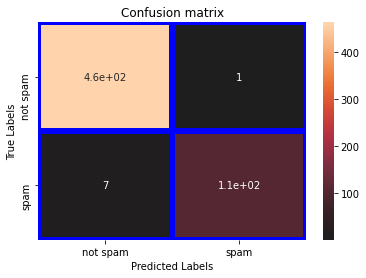

In [26]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='b',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

SVM accuracy better than NB

In [27]:
#We see SVM to perform the best.
#save the best model.
import pickle
filename='Email_spam_detect.pkl'
M=open(filename,'wb')
pickle.dump(SVM,M)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
M.close()

In [28]:
# Lemmatizer object
#ps = PorterStemmer()
#wordnet = WordNetLemmatizer()
#empty list to append the Cleaned Data
#corpus = []
#for i in range(0,len(df)):
    # to remove values except a-zA-Z 
   # df['message'] = re.sub('[^a-zA-Z]',' ',df['message'][i])
    #

1.Done all the pre-processing steps to make data ready for model building.

2.Removed stop words and create another feature ‘clean_length’ for comparing cleaned and unprocessed message length.

3. Understood relationship and gain insights by using Data Visualization:

a. Plotted count plot for checking spam and non-spam email counts.
b. Message Distribution before and after cleaning.
c. Lastly, visualize some popular terms in spam messages using the word cloud.
4.Used Tf-idf vectorizer to convert text into vector.

5.Found the best model as SVM which provides max accuracy of 98.75%.

6. Found high precision and recall score of 0.99.

7. Confusion matrix shows high classification accuracy with only 8 out of 481 are incorrect.

8.Overall model fit is good.